<a href="https://colab.research.google.com/github/BlackCurrantDS/Data-Mining/blob/master/Bisecting_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [75]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:, [1, 2, 3, 4]].values #since we know the position

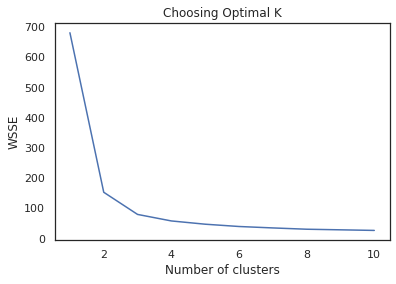

In [76]:
#elbow method to get number of clusters

wsse = []

for i in range(1, 11): #random range 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_)
    
#Plotting the results

plt.plot(range(1, 11), wsse)
plt.title('Choosing Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE') #within cluster sum of squares
plt.show()

In [77]:
#getting k-means with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [78]:
#getting SSE for each cluster

cluster_centers = [x[kmeans.labels_ == i].mean(axis=0) for i in range(3)]

clusterwise_sse = [0, 0, 0]
for point, label in zip(x, kmeans.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()

In [79]:
clusterwise_sse

[23.879473684210517, 15.240400000000003, 39.820967741935476]

Bisecting K-means

**Step 1** Choose 2 initial centroids, assign each object to its closest centroid, recompute the centroids after assignment Repeat until the centroids do not change anymore

**Step 2** Calculate SSE of both the clusters, choose the cluster with the larger SSE to split

**Step 3** Initialize, the centroids for the selected cluster and repeat the above steps

**Step 4** Continue the process untill required number of clusters are obtained


In [80]:
def run_kmeans(n, data):
  kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  y_kmeans = kmeans.fit_predict(data)
  cluster_centers = [x[kmeans.labels_ == i].mean(axis=0) for i in range(2)]

  clusterwise_sse = [0, 0]
  for point, label in zip(x, kmeans.labels_):
      clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
  return y_kmeans,clusterwise_sse,kmeans



In [81]:
for i in range(2):

  y_kmeans,clusterwise_sse,kmeans= run_kmeans(2,x)
  
  print(clusterwise_sse)

  x, clust = (x[kmeans.labels_ == 0],x[kmeans.labels_ == 1]) if clusterwise_sse[0]>clusterwise_sse[1] else (x[kmeans.labels_ == 1],x[kmeans.labels_ == 0])
  

[28.57283018867925, 123.7958762886598]
[23.879473684210517, 31.77220338983051]
